In [28]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing trining and testing files
train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')

In [3]:
train.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category
0,15001,VENDOR-1676,GL-6100410,83.24,Artworking/Typesetting Production Jun 2009 Cha...,CLASS-1963
1,15002,VENDOR-1883,GL-2182000,51.18,Auto Leasing Corporate Services Corning Inc /N...,CLASS-1250
2,15004,VENDOR-1999,GL-6050100,79.02,Store Management Lease/Rent Deltona Corp Real ...,CLASS-1274
3,15005,VENDOR-1771,GL-6101400,48.50,Store Construction General Requirements Coloni...,CLASS-1522
4,15006,VENDOR-1331,GL-2182000,63.35,Jul 2015 Aydin Corp Contingent Labor/Temp Labo...,CLASS-1376


In [4]:
train.shape

(5566, 6)

In [5]:
test.shape

(2446, 5)

### Univariate Analysis 

#### dependent variable : Product Category

In [7]:
train['Product_Category'].value_counts().shape

(36,)

total 36 classes are present , that need to be predicted i.e multiclass classification problem

#### categorical independent variables

In [8]:
#Vendor_Code

In [9]:
train['Vendor_Code'].value_counts().shape

(1253,)

total 1253 unique vendor codes are present , i.e it seems that vendor_represents the Vendor(firm) that is providing a particular product 

Since , high no. of categorical values are there this feature might no be of much use 

In [10]:
#GL_Code

In [12]:
train['GL_Code'].value_counts()

GL-6050310    1618
GL-2182000    1297
GL-6050100     962
GL-6101400     802
GL-6100410     388
GL-6100500     220
GL-6060100     158
GL-6121905      89
GL-6020600      32
Name: GL_Code, dtype: int64

9 unique vlues are there , might be useful 

In [13]:
#Item_Description

In [14]:
train['Item_Description'].value_counts().shape

(5558,)

every one is different

In [18]:
#checking what does discription says 
train['Item_Description'][1]

'Auto Leasing Corporate Services Corning Inc /Ny 2013-Mar  Auto Leasing and Maintenance Other Corporate Services'

it seems each description tells
- name of the vendor
- year month
- product type

therfore converting this text to features by various methods we can predict category more accurately

#### numerical independent variable 

In [19]:
#Inv_Amt

In [21]:
train['Inv_Amt'].describe()

count    5566.000000
mean       49.980151
std        28.903030
min         0.010000
25%        24.957500
50%        49.645000
75%        75.170000
max        99.990000
Name: Inv_Amt, dtype: float64

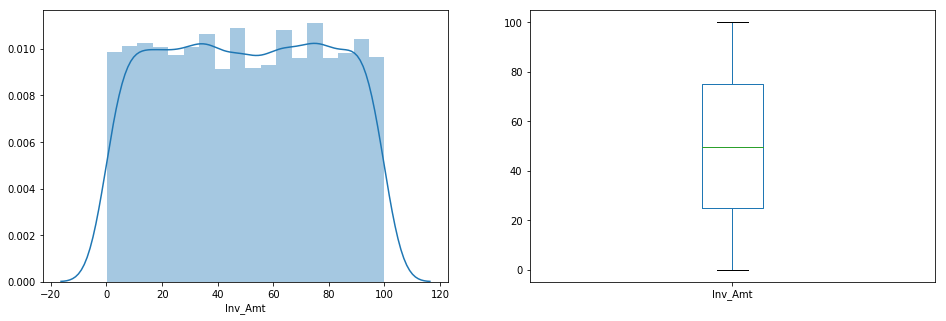

In [29]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['Inv_Amt']); 
plt.subplot(122)
train['Inv_Amt'].plot.box(figsize=(16,5)) 
plt.show()

### Bivariate analysis

In [22]:
#GL_code and Product_Category

In [23]:
GL_Code=pd.crosstab(train['GL_Code'],train['Product_Category']) 
GL_Code

Product_Category,CLASS-1248,CLASS-1249,CLASS-1250,CLASS-1274,CLASS-1294,CLASS-1309,CLASS-1322,CLASS-1376,CLASS-1429,CLASS-1477,...,CLASS-1964,CLASS-1983,CLASS-2003,CLASS-2015,CLASS-2038,CLASS-2112,CLASS-2141,CLASS-2146,CLASS-2152,CLASS-2241
GL_Code,,,,,,,,,,,,,,,,,,,,,
GL-2182000,5,176,451,0,25,0,0,365,0,50,...,28,0,32,0,0,0,108,0,0,36
GL-6020600,0,0,0,0,0,0,28,0,0,0,...,0,0,0,2,0,0,0,2,0,0
GL-6050100,0,0,0,946,0,0,0,0,0,0,...,0,16,0,0,0,0,0,0,0,0
GL-6050310,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GL-6060100,0,0,0,40,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
GL-6100410,0,0,0,0,0,0,0,0,32,0,...,0,0,0,0,13,0,0,0,0,0
GL-6100500,0,0,0,0,0,32,0,0,0,0,...,0,0,0,0,0,0,0,0,9,0
GL-6101400,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,53,0,0,0,0
GL-6121905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
#calculating no. of classes predicted by a single gl_code
(GL_Code!=0).sum(1)

GL_Code
GL-2182000    14
GL-6020600     3
GL-6050100     2
GL-6050310     3
GL-6060100     4
GL-6100410     4
GL-6100500     5
GL-6101400     2
GL-6121905     2
dtype: int64

therefore it shows particular GL_Code are for particular Product_Category

In [31]:
#Inv_Amt vs Product_Category

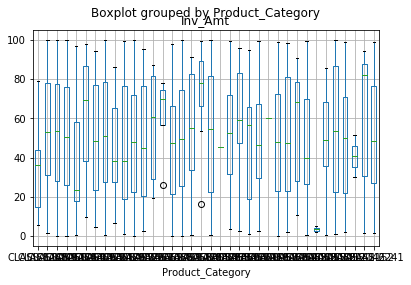

In [30]:
train.boxplot(column='Inv_Amt', by = 'Product_Category')

product category depends on amount 

### making text corpus using the description variable , which is most important for prediction 

In [41]:
train_x=train.drop('Product_Category',1)
train_objs_num = len(train)
#concating the test and train
dataset = pd.concat(objs=[train_x, test], axis=0)
dataset.reset_index(inplace=True)
train_preprocessed = dataset[:train_objs_num]
test_preprocessed = dataset[train_objs_num:]

In [33]:
# Import BeautifulSoup , regular expressions and nltk to work on text
from bs4 import BeautifulSoup             
import re
import nltk
from nltk.corpus import stopwords # Import the stop word list

In [34]:
def review_to_words( description ):
    # Function to convert a description to a string of words
    # The input is a single string (a discription), and 
    # the output is a single string (a preprocessed description)
    #
    # 1. Remove HTML
    description = BeautifulSoup(description).get_text() 
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", description) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string sep
    # and return the result.
    return( " ".join( meaningful_words ))   

In [37]:
#checking
review_to_words( train['Item_Description'][0] )


'artworking typesetting production jun champion parts inc smap prototype comp production packaging design'

In [38]:
train['Item_Description'][0]

'Artworking/Typesetting Production Jun 2009 Champion Parts Inc SMAP Prototype and Comp Production/Packaging Design'

In [42]:
# Get the number of description based on the dataframe column size
num_discription = dataset['Item_Description'].size

# Initialize an empty list to hold the clean discriptions
clean_descriptions = []

# Loop over each description; create an index i that goes from 0 to the length
# of the dataframe 
for i in range( 0, num_discription ):
    # Call our function for each one, and add the result to the list of
    # clean description
    clean_descriptions.append( review_to_words( dataset['Item_Description'][i] ) )

In [45]:
#checking
len(clean_descriptions)

8012

#### bag of words

##### 1. count vectorizer  

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",  tokenizer = None, preprocessor = None,stop_words = None)  

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
dataset_features = vectorizer.fit_transform(clean_descriptions)



In [52]:
dataset_features.shape

(8012, 1821)

In [53]:
#converting back to train and test
train_preprocessed = dataset_features[:train_objs_num]
test_preprocessed = dataset_features[train_objs_num:]

In [54]:
train_preprocessed.shape

(5566, 1821)

In [56]:
train.shape

(5566, 6)

### modelling 

In [58]:

from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable

forest = forest.fit( train_preprocessed, train["Product_Category"] )

In [59]:
#predicting on train data itself
train_pred=forest.predict(train_preprocessed)

In [60]:
from sklearn.metrics import accuracy_score 
accuracy_score(train["Product_Category"],train_pred)

1.0

fully learnt the  training data

In [61]:
#predicting for test data
test_pred=forest.predict(test_preprocessed)

In [62]:
#converting to csv 
sub=pd.DataFrame(test['Inv_Id'])
sub['Product_Category']=test_pred
sub.to_csv('rf_count.csv',index=False)

##### 2. TF-IDF 

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
# bag of words tool.  
tfidfvectorizer = TfidfVectorizer(analyzer = "word",tokenizer = None,preprocessor = None, stop_words = None) 

In [64]:
tfidf_features = tfidfvectorizer.fit_transform(clean_descriptions)

In [65]:
#train-test
train_preprocessed_tfidf = tfidf_features[:train_objs_num]
test_preprocessed_tfidf = tfidf_features[train_objs_num:]

In [66]:
#modelling using random forest as above only
forest = forest.fit( train_preprocessed_tfidf, train["Product_Category"] )

In [68]:
train_tfidf_pred=forest.predict(train_preprocessed_tfidf)

In [70]:
accuracy_score(train["Product_Category"],train_tfidf_pred)

1.0

In [71]:
#predicting for test data
test_tfidf_pred=forest.predict(test_preprocessed_tfidf)

In [72]:
sub2=pd.DataFrame(test['Inv_Id'])
sub2['Product_Category']=test_pred
sub2.to_csv('tfidf_rf.csv',index=False)

### Got a score of 99.84 , it can be improved using other parameters like GL_Code and Inv_amt , also differnt algorithms can be used like XGBoost and fine tune for better accuracy 